<a href="https://colab.research.google.com/github/Bharatgwl/Pytorch-/blob/main/Building_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt


In [46]:
df = pd.read_csv('fmnist_small.csv')

In [47]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


In [48]:
df.shape

(6000, 785)

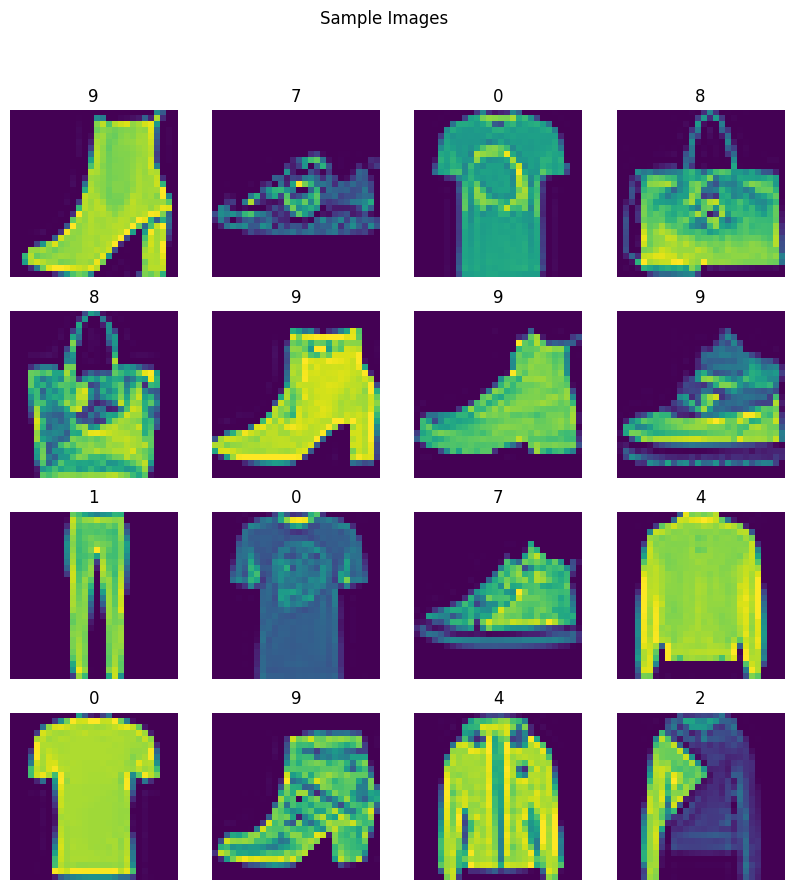

In [49]:
fig , axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle('Sample Images')
for i , ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(df.iloc[i,0])
plt.show()

In [50]:
X =df.iloc[:,1:].values
y = df.iloc[:,0].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [52]:
X_train = X_train/255.0
X_test = X_test/255.0

In [53]:
#set seed
torch.manual_seed(42)

In [54]:
# create a custom data class
class FashionDataset(Dataset):
  def __init__(self,features , labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]



In [55]:
X_trainset = FashionDataset(X_train,y_train)
X_testset = FashionDataset(X_test,y_test)

In [56]:
train_loader = DataLoader(X_trainset,batch_size=32,shuffle=True)
test_loader = DataLoader(X_testset,batch_size=32,shuffle=False)

In [57]:
class NN(nn.Module):
  def __init__(self,inputfeatures):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(inputfeatures,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)



In [58]:
epochs = 100
lr = 0.1
loss_function = nn.CrossEntropyLoss()
model = NN(X_train.shape[1])
optimizer = optim.SGD(model.parameters(),lr=lr)

In [59]:
for epoch in range(epochs):
  total_epoch_loss  = 0

  for batch_features ,labels in train_loader:
    ypred = model(batch_features)
    loss = loss_function(ypred,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_epoch_loss += loss.item()
  avg_loss = total_epoch_loss/len(train_loader)
  print(f"epoch:{epoch+1} loss:{avg_loss}")

epoch:1 loss:1.321636847257614
epoch:2 loss:0.7793365468581518
epoch:3 loss:0.642752461830775
epoch:4 loss:0.575165734688441
epoch:5 loss:0.5278772555788358
epoch:6 loss:0.49531099627415337
epoch:7 loss:0.46192684849103294
epoch:8 loss:0.4355264962216218
epoch:9 loss:0.4189064339796702
epoch:10 loss:0.39741519580284757
epoch:11 loss:0.38665723691383996
epoch:12 loss:0.3712777954339981
epoch:13 loss:0.34902072300513587
epoch:14 loss:0.3476298316816489
epoch:15 loss:0.3158551316956679
epoch:16 loss:0.31195787246028583
epoch:17 loss:0.2958236759901047
epoch:18 loss:0.2882651353875796
epoch:19 loss:0.2712535948306322
epoch:20 loss:0.25993845276534555
epoch:21 loss:0.25771099572380385
epoch:22 loss:0.2449994078775247
epoch:23 loss:0.2397058691829443
epoch:24 loss:0.22276731016735235
epoch:25 loss:0.22197383304437002
epoch:26 loss:0.21040236316621302
epoch:27 loss:0.22004777260124683
epoch:28 loss:0.21297984859595695
epoch:29 loss:0.1838361440723141
epoch:30 loss:0.18515997290611266
epoch:31

In [60]:
model.eval()

NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [61]:
len(test_loader)

38

In [62]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features,labels in test_loader:
    ypred = model(batch_features)
    _,predicted = torch.max(ypred.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(correct/total)


0.8333333333333334
